# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import pandas as pd
import seaborn as sns
from data.data_cleaning import remove_nullrows, median_imputation, abbreviate_features, remove_redundant_features

# Define Path Constants

In [3]:
RAW_PATH = "../data/unprocessed/IMT_Classification_Dataset_Raw_Feature_Set_v9.xlsx"
SAVE_PATH = "../data/processed/IMT_Classification_Dataset_Full_Feature_Set_v9.xlsx"

# Exploratory Data Analysis

## 1. Read in the [unprocessed dataset](https://github.com/rpw199912j/mit_model_code/blob/master/data/unprocessed/IMT_Classification_Dataset_matminer_and_handbuilt_v9.xlsx)

In [4]:
df_raw = pd.read_excel(RAW_PATH)
df_raw

,Compound,Label,struct_file_path,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,max_xx_dists,min_xx_dists,avg_xx_dists,v_m,v_x,iv,iv_p1,est_hubbard_u,est_charge_trans,volume_per_site
0,CaCrO3,0,../data/Structures/Metals/CaCrO3_CollCode_2458...,8,24,16,13.600000,6.720000,8,7,...,3.283740,2.677252,2.813798,-46.438514,25.057295,49.1600,69.46000,16.458029,7.076892,10.539100
1,RuO2,0,../data/Structures/Metals/RuO2_CollCode_15071.cif,8,44,36,20.000000,16.000000,8,56,...,2.776388,2.467313,2.673363,-44.781726,25.598980,45.0000,59.00000,9.927380,10.334715,10.447064
2,PtO2,0,../data/Structures/Metals/PtO2_CollCode_647316...,8,78,70,31.333333,31.111111,8,63,...,2.778745,2.473672,2.677054,-44.714142,25.527843,43.0000,56.00000,8.928277,12.201757,10.493442
3,SrOsO3,0,../data/Structures/Metals/SrOsO3_SD_0375560.cif,8,76,68,27.600000,23.520000,8,8,...,3.248982,2.859021,2.962374,-42.747293,23.484681,41.0000,55.00000,10.347625,10.509724,12.232597
4,TiO,0,../data/Structures/Metals/TiO_CollCode_56612.cif,8,22,14,15.000000,7.000000,8,43,...,2.972889,2.972889,2.972889,-23.941499,23.941499,13.5755,27.49171,9.072555,19.746718,9.289474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,GdNiO3,2,../data/Structures/MIT_materials/HighT/GdNiO3_...,8,64,56,23.200000,18.240000,8,27,...,3.226412,2.717248,2.837820,-37.163808,23.507399,35.1870,54.92000,15.921411,10.413110,10.837428
279,Sr3Fe2O7,2,../data/Structures/MIT_materials/HighT/Sr3Fe2O...,8,38,30,18.500000,12.250000,8,8,...,3.586772,2.756961,2.847590,-44.794374,24.763775,54.9100,75.00000,16.452849,-0.397557,12.949911
280,Cu(IrS2)2,2,../data/Structures/MIT_materials/HighT/CuIr2S4...,16,77,61,35.285714,23.836735,16,60,...,3.760108,3.203055,3.484365,-28.508956,21.335783,28.0000,40.00000,7.864049,20.488443,17.052054
281,Hg2Ru2O7,2,../data/Structures/MIT_materials/HighT/Hg2Ru2O...,8,80,72,27.636364,24.991736,8,56,...,3.654839,2.684031,3.051351,-52.293109,27.009665,59.0000,76.00000,13.007450,5.125164,12.063048


We can see that there are 283 rows and 168 columns. Since the `Compound` and `struct_file_path` columns are not predictors and `Label` column is the target/response column, in addition to the fact that `struct_ordered` and `struct_disordered` are just the one-hot encoded version of same categorical feature [is_ordered](https://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.SiteCollection.is_ordered) from Pymatgen, we have **283** compounds and **164** predictors in the unprocessed dataset.

That being said, there are also compounds that have multiple entries in the unprocessed dataset. For instance, some MIT compounds have both a high-temperature structure and a low-temperature structure (i.e. one structure above the transition temperature and another below the transition temperature). As a result, we will only keep 1 entry for each unique compound from now on. The general rule is to keep the high-temperature structure if there are both the high-temperature and low-temperature structures present.

In [5]:
# first sort the compounds by label, compound name, struct_file_path alphabetically
df_raw = df_raw.sort_values(by=["Label", "Compound", "struct_file_path"], ascending=[True, True, False], ignore_index=True)
# if there are multiple entries, preserve the last one
df_raw = df_raw.drop_duplicates(subset="Compound", keep="last")
df_raw

,Compound,Label,struct_file_path,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,max_xx_dists,min_xx_dists,avg_xx_dists,v_m,v_x,iv,iv_p1,est_hubbard_u,est_charge_trans,volume_per_site
0,BaMoO3,0,../data/Structures/Metals/BaMoO3_CollCode_2915...,8,56,48,24.400000,19.680000,8,9,...,2.857256,2.857256,2.857256,-44.108215,23.006209,40.330000,54.417000,10.523409,11.946426,13.195395
1,BaNiS2,0,../data/Structures/Metals/BaNiS2_CollCode_2469...,16,56,40,29.000000,13.500000,16,9,...,3.783737,3.137645,3.654519,-21.082598,20.132993,18.168838,35.187000,12.893512,21.595766,21.929081
2,BaOsO3,0,../data/Structures/Metals/BaOsO3_SD_0375565.cif,8,76,68,31.200000,27.840000,8,9,...,3.100000,2.893540,2.978994,-36.659700,22.481523,41.000000,55.000000,8.412244,3.591515,16.289915
3,Bi2Ru2O7,0,../data/Structures/Metals/Bi2Ru2O7_CollCode_73...,8,83,75,28.181818,25.685950,8,56,...,3.691300,2.717536,3.077187,-47.298875,24.715398,45.000000,59.000000,10.043255,11.876142,12.393497
4,Ca3Ru2O7,0,../data/Structures/Metals/Ca3Ru2O7_CollCode_15...,8,44,36,17.000000,10.500000,8,7,...,3.488882,2.740999,2.933553,-43.378203,25.385677,45.000000,59.000000,10.277936,8.827434,12.120246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,V6O13,2,../data/Structures/MIT_materials/HighT/V6O13_H...,8,23,15,12.736842,6.481994,8,46,...,3.269140,2.461773,2.767633,-32.743339,35.209237,65.281650,128.125000,58.592940,-12.467020,11.494831
276,V8O15,2,../data/Structures/MIT_materials/HighT/V8O15_H...,8,23,15,13.217391,6.805293,8,46,...,3.474319,2.529565,2.819850,-38.212724,31.173210,42.359525,60.638487,13.875184,11.940681,9.935308
279,VO2,2,../data/Structures/MIT_materials/HighT/VO2_HT_...,8,23,15,13.000000,6.666667,8,46,...,2.725617,2.575183,2.675472,-45.333235,26.337259,46.709000,65.281650,14.484546,9.779242,9.863262
280,YNiO3,2,../data/Structures/MIT_materials/HighT/YNiO3_6...,8,39,31,18.200000,12.240000,8,12,...,3.184308,2.736503,2.827539,-36.802534,23.821848,35.187000,54.920000,15.898371,10.393278,10.686816


As we can see, there are **229** unique compounds.

## 2. Explore missing values

### By column

In [6]:
columns_na_info = pd.DataFrame(df_raw.isna().sum(), columns=["num_na"])

In [7]:
columns_na_info[columns_na_info.num_na != 0]

,num_na
gii,51
max_mm_dists,1
min_mm_dists,1
avg_mm_dists,1
max_mx_dists,1
min_mx_dists,1
avg_mx_dists,1
v_m,2
v_x,1
iv,4


### By row

In [8]:
rows_na_info = pd.DataFrame(df_raw.isna().sum(axis=1), columns=["num_na"])
pd.merge(df_raw[["Compound"]], rows_na_info[rows_na_info.num_na != 0].sort_values(by="num_na", ascending=False),
         left_index=True, right_index=True, how="right")

,Compound,num_na
136,SiO2,11
39,V7O13,6
73,CoSb3,5
72,CoP3,4
70,CoAs3,2
13,LiTi2O4,1
189,CaFe4(CuO4)3,1
153,Sr2NbFeO6,1
159,Sr4.002La1.998Fe6O17.874,1
160,Sr8Fe8O22.45104,1


## 3. Explore target variable

In [9]:
df_raw.Label.value_counts()

1    126
2     62
0     41
Name: Label, dtype: int64

Here is a table that shows what each value mean in the target variable

|value|meaning|
|:----|:------|
|2    |MIT    |
|1    |Insulator|
|0    |Metal  |

We can immediately see that if we were to make a classification model, the input dataset is **imbalanced**.

## 4. Predictor correlation

### Randomly sample 10 features to create a correlation matrix

In [10]:
corr_df = df_raw.drop(columns="Label").sample(n=10, axis=1, random_state=31415926).corr()

### Make a heatmap

<AxesSubplot:>

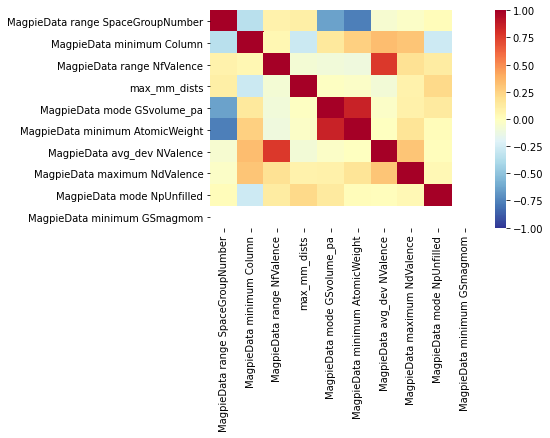

In [11]:
sns.heatmap(corr_df, vmin=-1, vmax=1, center=0, cmap="RdYlBu_r")

### See the correlation between the MendeleevNumber features

In [12]:
mendeleev_df = df_raw.filter(like="MendeleevNumber", axis=1)
mendeleev_df

,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber
0,9,87,78,64.000000,27.600000,87
1,9,88,79,61.500000,26.500000,88
2,9,87,78,65.400000,25.920000,87
3,56,87,31,81.181818,9.157025,87
4,7,87,80,61.833333,29.361111,87
...,...,...,...,...,...,...
275,46,87,41,74.052632,17.717452,87
276,46,87,41,72.739130,18.601134,87
279,46,87,41,73.333333,18.222222,87
280,12,87,75,66.800000,24.240000,87


In [13]:
mendeleev_df.corr()

,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber
MagpieData minimum MendeleevNumber,1.000000,0.016143,-0.999654,0.840651,-0.875276,-0.222038
MagpieData maximum MendeleevNumber,0.016143,1.000000,0.010145,-0.060685,0.105759,-0.064844
MagpieData range MendeleevNumber,-0.999654,0.010145,1.000000,-0.842312,0.878125,0.220351
MagpieData mean MendeleevNumber,0.840651,-0.060685,-0.842312,1.000000,-0.977660,0.071612
MagpieData avg_dev MendeleevNumber,-0.875276,0.105759,0.878125,-0.977660,1.000000,0.054959
MagpieData mode MendeleevNumber,-0.222038,-0.064844,0.220351,0.071612,0.054959,1.000000


<AxesSubplot:>

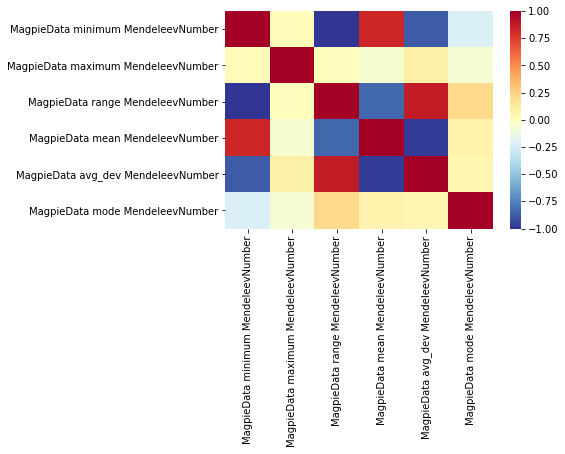

In [14]:
sns.heatmap(mendeleev_df.corr(), vmin=-1, vmax=1, center=0, cmap="RdYlBu_r")

# Data cleaning workflow

## 1. Remove rows with more than 6 NaN values

In [15]:
df_processed = remove_nullrows(df_raw, 6)

In [16]:
df_processed.shape[0] - df_raw.shape[0]

-1

We can see that we only dropped 1 row after this step, which is SiO$_2$.

## 2. Impute the missing values with the median of the corresponding feature within each label group

We first group the dataframe by the column `Label`, find the median for each column within each `Label` group and then impute the missing values with those medians.

In [17]:
df_processed = median_imputation(df_processed)

We can also confirm if all the missing values are indeed filled with mean values.

In [18]:
pd.DataFrame(df_processed.isna().sum(), columns=["num_na"])[columns_na_info.num_na != 0]

,num_na
gii,0
max_mm_dists,0
min_mm_dists,0
avg_mm_dists,0
max_mx_dists,0
min_mx_dists,0
avg_mx_dists,0
v_m,0
v_x,0
iv,0


## 3. Rename the columns for easier readability and plotting

In the heatmap, you might see that there are feautures with a "MagpieData" prefix. This step delete all those prefixes from the variable names and fill the white space with underscore.

In [19]:
df_processed = abbreviate_features(df_processed)

## 4. Remove columns with zero variance and high correlations

In [20]:
df_processed = remove_redundant_features(df_processed)

In [21]:
df_processed.shape[1] - df_raw.shape[1]

-61

Just by removing the zero-variance & highly correlated columns, we reduce the number of columns by 61.

Now that we have **228** compounds, we can also check the number of compounds for each class after cleaning.

In [22]:
df_processed.Label.value_counts()

1    125
2     62
0     41
Name: Label, dtype: int64

## 5. Save the processed dataset

In [23]:
df_processed.to_excel(SAVE_PATH, index=False)
df_processed

,Compound,Label,struct_file_path,maximum_MendeleevNumber,range_MendeleevNumber,avg_dev_MendeleevNumber,range_AtomicWeight,mean_AtomicWeight,avg_dev_AtomicWeight,mode_AtomicWeight,...,max_xx_dists,min_xx_dists,avg_xx_dists,v_m,v_x,iv,iv_p1,est_hubbard_u,est_charge_trans,volume_per_site
0,BaMoO3,0,../data/Structures/Metals/BaMoO3_CollCode_2915...,87,78,27.600000,121.32760,56.257040,48.309168,15.9994,...,2.857256,2.857256,2.857256,-44.108215,23.006209,40.330000,54.417000,10.523409,11.946426,13.195395
1,BaNiS2,0,../data/Structures/Metals/BaNiS2_CollCode_2469...,88,79,26.500000,105.26200,65.037600,36.144700,32.0650,...,3.783737,3.137645,3.654519,-21.082598,20.132993,18.168838,35.187000,12.893512,21.595766,21.929081
2,BaOsO3,0,../data/Structures/Metals/BaOsO3_SD_0375565.cif,87,78,25.920000,174.23060,75.111040,70.933968,15.9994,...,3.100000,2.893540,2.978994,-36.659700,22.481523,41.000000,55.000000,8.412244,3.591515,16.289915
3,Bi2Ru2O7,0,../data/Structures/Metals/Bi2Ru2O7_CollCode_73...,87,31,9.157025,192.98100,66.554236,64.342519,15.9994,...,3.691300,2.717536,3.077187,-47.298875,24.715398,45.000000,59.000000,10.043255,11.876142,12.393497
4,Ca3Ru2O7,0,../data/Structures/Metals/Ca3Ru2O7_CollCode_15...,87,80,29.361111,85.07060,36.197483,23.564431,15.9994,...,3.488882,2.740999,2.933553,-43.378203,25.385677,45.000000,59.000000,10.277936,8.827434,12.120246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,V6O13,2,../data/Structures/MIT_materials/HighT/V6O13_H...,87,41,17.717452,34.94210,27.033747,15.099633,15.9994,...,3.269140,2.461773,2.767633,-32.743339,35.209237,65.281650,128.125000,58.592940,-12.467020,11.494831
276,V8O15,2,../data/Structures/MIT_materials/HighT/V8O15_H...,87,41,18.601134,34.94210,28.153174,15.852749,15.9994,...,3.474319,2.529565,2.819850,-38.212724,31.173210,42.359525,60.638487,13.875184,11.940681,9.935308
279,VO2,2,../data/Structures/MIT_materials/HighT/VO2_HT_...,87,41,18.222222,34.94210,27.646767,15.529822,15.9994,...,2.725617,2.575183,2.675472,-45.333235,26.337259,46.709000,65.281650,14.484546,9.779242,9.863262
280,YNiO3,2,../data/Structures/MIT_materials/HighT/YNiO3_6...,87,75,24.240000,72.90645,39.119490,27.744108,15.9994,...,3.184308,2.736503,2.827539,-36.802534,23.821848,35.187000,54.920000,15.898371,10.393278,10.686816
